In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [23]:
df = pd.read_csv('SMSSpamCollection.csv')
df = df.sample(frac = 1,random_state = 3)

In [24]:
df.head()

,Class,sms
2632,spam,"URGENT! Your mobile No 077xxx WON a £2,000 Bon..."
454,ham,Ok i will tell her to stay out. Yeah its been ...
983,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
1282,ham,Am I the only one who doesn't stalk profiles?
4610,ham,Y de asking like this.


In [25]:
df['Class'] = df['Class'].map({'spam' : 1, 'ham':0})

In [26]:
y = df['Class']
X = df.sms

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [29]:
vect.fit(X_train)
X_train_t = vect.transform(X_train)
X_test_t = vect.transform(X_test)

In [30]:
type(X_test_t)

scipy.sparse.csr.csr_matrix

In [31]:
X_train_t.shape

(3900, 6855)

In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train_t,y_train)

Confusion matrix - Train : 
 [[3358   12]
 [   7  523]]
Overall accuracy :  0.9951282051282051
AUC - Train :  0.9983645932478585

Confusion matrix - Test : 
 [[1442   13]
 [  15  202]]
Overall accuracy - Test :  0.9832535885167464
AUC - Test :  0.985506833262071


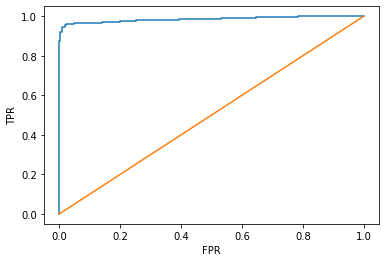

In [43]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score

### TRAIN
y_train_ypred = mnb.predict(X_train_t)
y_train_prob = mnb.predict_proba(X_train_t)[:,-1]

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST
y_test_ypred = mnb.predict(X_test_t)
y_test_prob = mnb.predict_proba(X_test_t)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [45]:
sms = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})

In [54]:
sms[sms['fpr'] == 0]

,fpr,tpr,thresholds
0,0.0,0.000000,2.000000
1,0.0,0.267281,1.000000
2,0.0,0.281106,1.000000
3,0.0,0.313364,1.000000
4,0.0,0.327189,1.000000
5,0.0,0.345622,1.000000
6,0.0,0.350230,1.000000
7,0.0,0.368664,1.000000
8,0.0,0.465438,1.000000
9,0.0,0.483871,1.000000
